In [85]:
import sympy as sp

In [86]:
EI, x = sp.symbols('EI, x',real=True)

In [87]:
Av, Bv, Cv = sp.symbols('Av, Bv, Cv',real=True)
a, b, L1, L2 = sp.symbols('a, b, L1, L2',positive=True,real=True)
q = Bv * sp.SingularityFunction(x,L1,-1) - Av * sp.SingularityFunction(x,0,-1) - Cv * sp.SingularityFunction(x,L1+L2,-1)
display(q)

-Av*SingularityFunction(x, 0, -1) + Bv*SingularityFunction(x, L1, -1) - Cv*SingularityFunction(x, L1 + L2, -1)

In [88]:
C1, C2, C3, C4 = sp.symbols('C1, C2, C3, C4')
#C5 = sp.symbols('C5')
V = -sp.integrate(q,x)+C1
M = sp.integrate(V,x)+C2
kappa = M / EI
phi = sp.integrate(kappa,x)+C3 - sp.SingularityFunction(x,a,0)# + C5 * sp.SingularityFunction(x,b,0)
w = sp.integrate(phi,x)+C4
display(V)
display(M)
display(phi)
display(w)

Av*SingularityFunction(x, 0, 0) - Bv*SingularityFunction(x, L1, 0) + C1 + Cv*SingularityFunction(x, L1 + L2, 0)

Av*SingularityFunction(x, 0, 1) - Bv*SingularityFunction(x, L1, 1) + C1*x + C2 + Cv*SingularityFunction(x, L1 + L2, 1)

C3 - SingularityFunction(x, a, 0) + (Av*SingularityFunction(x, 0, 2)/2 - Bv*SingularityFunction(x, L1, 2)/2 + C1*x**2/2 + C2*x + Cv*SingularityFunction(x, L1 + L2, 2)/2)/EI

C3*x + C4 - SingularityFunction(x, a, 1) + (Av*SingularityFunction(x, 0, 3)/6 - Bv*SingularityFunction(x, L1, 3)/6 + C1*x**3/6 + C2*x**2/2 + Cv*SingularityFunction(x, L1 + L2, 3)/6)/EI

{C1: 0,
 C2: 0,
 C3: L1**2*SingularityFunction(L1, a, 1)/(2*L1**2*L2 + 2*L1*L2**2) - L1**2*SingularityFunction(L1 + L2, a, 1)/(2*L1**2*L2 + 2*L1*L2**2) + 3*L1*L2*SingularityFunction(L1, a, 1)/(2*L1**2*L2 + 2*L1*L2**2) + 2*L2**2*SingularityFunction(L1, a, 1)/(2*L1**2*L2 + 2*L1*L2**2),
 C4: 0,
 Av: -3*EI*L1*SingularityFunction(L1, a, 1)/(L1**3*L2 + L1**2*L2**2) + 3*EI*L1*SingularityFunction(L1 + L2, a, 1)/(L1**3*L2 + L1**2*L2**2) - 3*EI*L2*SingularityFunction(L1, a, 1)/(L1**3*L2 + L1**2*L2**2),
 Bv: -3*EI*SingularityFunction(L1, a, 1)/(L1*L2**2) + 3*EI*SingularityFunction(L1 + L2, a, 1)/(L1*L2**2) - 3*EI*SingularityFunction(L1, a, 1)/(L1**2*L2),
 Cv: -3*EI*L1*SingularityFunction(L1, a, 1)/(L1**2*L2**2 + L1*L2**3) + 3*EI*L1*SingularityFunction(L1 + L2, a, 1)/(L1**2*L2**2 + L1*L2**3) - 3*EI*L2*SingularityFunction(L1, a, 1)/(L1**2*L2**2 + L1*L2**3)}

Piecewise((x/10 - 1, x > 10), (-x**3/250 + 3*x**2/25 - 11*x/10 + 3, x > 5), (x**3/250 - x/2 + 2, x > 2), (x*(x**2 + 125)/250, x > 0), (x/2, True))

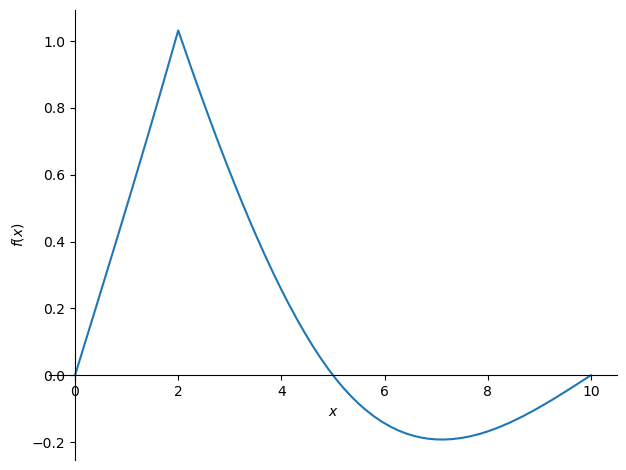

In [91]:
eq1 = sp.Eq(w.subs(x,0),0)
eq2 = sp.Eq(w.subs(x,L1),0)
eq3 = sp.Eq(w.subs(x,L1+L2),0)
eq4 = sp.Eq(M.subs(x,0),0)
eq5 = sp.Eq(M.subs(x,L1+L2),0)
eq6 = sp.Eq(V.subs(x,-1),0)
eq7 = sp.Eq(V.subs(x,L1+L2+1),0)
#eq8 = sp.Eq(M.subs(x,b),0)
sol = sp.solve([eq1,eq2,eq3,eq4,eq5,eq6,eq7],[C1,C2,C3,C4,Av,Bv,Cv])
display(sol)
w_sol = w.subs(sol)
w_subs = w_sol.subs([(L1,5),(L2,5),(a,2),(EI,5000)])
display(sp.simplify(w_subs.rewrite(sp.Piecewise)))
w_numpy = sp.lambdify([L1,L2,a,EI,x],w_sol.rewrite(sp.Piecewise))
sp.plot(w_subs,(x,0,10));

Av*SingularityFunction(x, 0, 0) - Bv*SingularityFunction(x, L1, 0) + C1 + Cv*SingularityFunction(x, L1 + L2, 0) - SingularityFunction(x, a, 0)

Av*SingularityFunction(x, 0, 1) - Bv*SingularityFunction(x, L1, 1) + C1*x + C2 + Cv*SingularityFunction(x, L1 + L2, 1) - SingularityFunction(x, a, 1)

C3 + (Av*SingularityFunction(x, 0, 2)/2 - Bv*SingularityFunction(x, L1, 2)/2 + C1*x**2/2 + C2*x + Cv*SingularityFunction(x, L1 + L2, 2)/2 - SingularityFunction(x, a, 2)/2)/EI

C3*x + C4 + (Av*SingularityFunction(x, 0, 3)/6 - Bv*SingularityFunction(x, L1, 3)/6 + C1*x**3/6 + C2*x**2/2 + Cv*SingularityFunction(x, L1 + L2, 3)/6 - SingularityFunction(x, a, 3)/6)/EI

{C1: 0,
 C2: 0,
 C3: L1**2*L2**2*SingularityFunction(L1 + L2, a, 1)/(12*EI*L1**2*L2 + 12*EI*L1*L2**2) + L1**2*SingularityFunction(L1, a, 3)/(12*EI*L1**2*L2 + 12*EI*L1*L2**2) - L1**2*SingularityFunction(L1 + L2, a, 3)/(12*EI*L1**2*L2 + 12*EI*L1*L2**2) + 3*L1*L2*SingularityFunction(L1, a, 3)/(12*EI*L1**2*L2 + 12*EI*L1*L2**2) + 2*L2**2*SingularityFunction(L1, a, 3)/(12*EI*L1**2*L2 + 12*EI*L1*L2**2),
 C4: 0,
 Av: -L1*L2**2*SingularityFunction(L1 + L2, a, 1)/(2*L1**3*L2 + 2*L1**2*L2**2) - L1*SingularityFunction(L1, a, 3)/(2*L1**3*L2 + 2*L1**2*L2**2) + L1*SingularityFunction(L1 + L2, a, 3)/(2*L1**3*L2 + 2*L1**2*L2**2) - L2*SingularityFunction(L1, a, 3)/(2*L1**3*L2 + 2*L1**2*L2**2),
 Bv: -SingularityFunction(L1 + L2, a, 1)/L2 - SingularityFunction(L1 + L2, a, 1)/(2*L1) - SingularityFunction(L1, a, 3)/(2*L1*L2**2) + SingularityFunction(L1 + L2, a, 3)/(2*L1*L2**2) - SingularityFunction(L1, a, 3)/(2*L1**2*L2),
 Cv: 2*L1**2*L2**2*SingularityFunction(L1 + L2 + 1, a, 0)/(2*L1**2*L2**2 + 2*L1*L2**3)

Piecewise((0, x > 10), (21/250, x > 5), (-121/250, x > 2), (129/250, x > 0), (0, True))

Piecewise((0, x > 10), (21*(x - 10)/250, x > 5), (2 - 121*x/250, x > 2), (129*x/250, x > 0), (0, True))

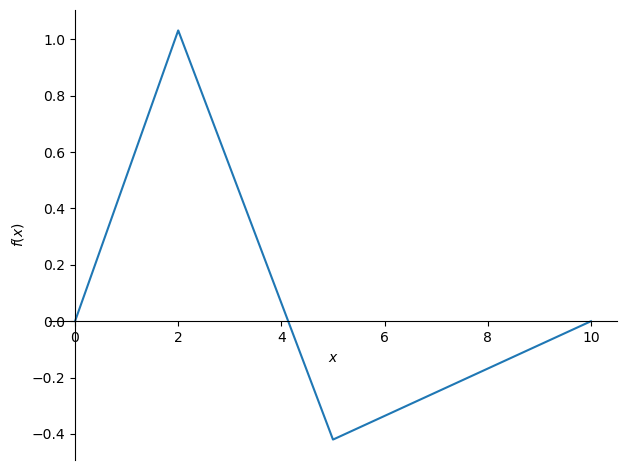

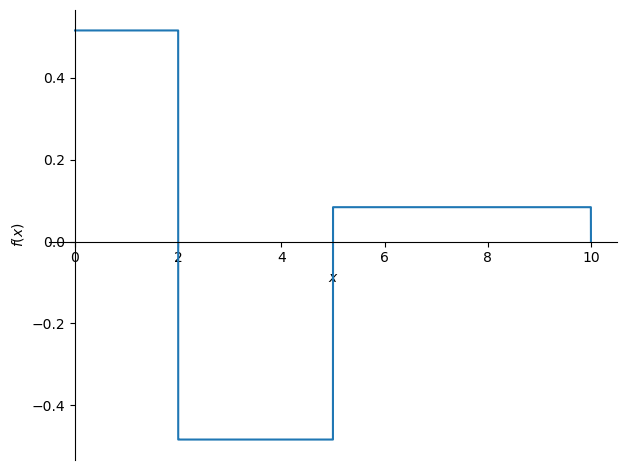

In [92]:
q += 1 * sp.SingularityFunction(x,a,-1)
V = -sp.integrate(q,x)+C1
M = sp.integrate(V,x)+C2
kappa = M / EI
phi = sp.integrate(kappa,x)+C3
w = sp.integrate(phi,x)+C4
display(V)
display(M)
display(phi)
display(w)
eq1 = sp.Eq(w.subs(x,0),0)
eq2 = sp.Eq(w.subs(x,L1),0)
eq3 = sp.Eq(w.subs(x,L1+L2),0)
eq4 = sp.Eq(M.subs(x,0),0)
eq5 = sp.Eq(M.subs(x,L1+L2),0)
eq6 = sp.Eq(V.subs(x,-1),0)
eq7 = sp.Eq(V.subs(x,L1+L2+1),0)
sol = sp.solve([eq1,eq2,eq3,eq4,eq5,eq6,eq7],[C1,C2,C3,C4,Av,Bv,Cv])
display(sol)
V_sol = V.subs(sol)
V_subs = V_sol.subs([(L1,5),(L2,5),(a,2),(EI,5000)])
display(sp.simplify(V_subs.rewrite(sp.Piecewise)))
V_numpy = sp.lambdify([L1,L2,a,EI,x],V_sol.rewrite(sp.Piecewise))
M_sol = M.subs(sol)
M_subs = M_sol.subs([(L1,5),(L2,5),(a,2),(EI,5000)])
display(sp.simplify(M_subs.rewrite(sp.Piecewise)))
M_numpy = sp.lambdify([L1,L2,a,EI,x],M_sol.rewrite(sp.Piecewise))
sp.plot(M_subs,(x,0,10))
sp.plot(V_subs,(x,0,10))

In [66]:
import numpy as np
import matplotlib.pylab as plt
from ipywidgets import widgets, interact
#x = np.linspace(0,10,100)
#plt.plot(x,w_numpy(5,5,2,5000,x));

def func(a):
    x = np.linspace(0,10,500)
    plt.plot([0,10],[0,0],color='black',linewidth=2)
    plt.gcf().set_size_inches(7, 3)
    plt.grid()
    plt.axis('equal')
    plt.plot(x,w_numpy(5,5,a,5000,x),color='blue')
    plt.annotate('%.2f kNm' % w_numpy(5,5,a,5000,a),xy = [a,1.5*w_numpy(5,5,a,5000,a)])
    plt.gca().invert_yaxis()
    plt.title('Influence line for moment at x = %.1f m' % a)

interact(func, a = widgets.FloatSlider(min=0, max=10, value=2, step=0.2, description="x (m)",readout_format='.1f'));

interactive(children=(FloatSlider(value=2.0, description='x (m)', max=10.0, readout_format='.1f', step=0.2), O…

In [131]:
import numpy as np
import matplotlib.pylab as plt
from ipywidgets import widgets, interact
#x = np.linspace(0,10,100)
#plt.plot(x,w_numpy(5,5,2,5000,x));

def func(a,b):
    x = np.linspace(0,10,500)
    fig, axs = plt.subplots(2, 1, figsize=(7, 8))
    axs[0].plot([0,10],[0,0],color='black',linewidth=2)
    axs[0].grid()
    axs[0].axis('equal')
    axs[0].plot(x,M_numpy(5,5,b,5000,x),color='blue')
    axs[0].plot(a,M_numpy(5,5,b,5000,a),marker='o')
    axs[0].annotate('%.2f kNm' % M_numpy(5,5,b,5000,a),xy = [a,M_numpy(5,5,b,5000,a)+0.5])
    axs[0].annotate(text='', xy=(b,0), xytext=(b,-1), arrowprops=dict(arrowstyle='simple'))
    axs[0].invert_yaxis()
    title0 = 'Moment distribution for force at $x = '+str(b)+'$, showing moment at $x = '+str(a)+'$'
    axs[0].set_title(title0)
    axs[1].plot([0,10],[0,0],color='black',linewidth=2)
    axs[1].grid()
    axs[1].axis('equal')
    axs[1].plot(x,w_numpy(5,5,a,5000,x),color='blue')
    axs[1].plot(b,w_numpy(5,5,a,5000,b),marker='o')
    axs[1].annotate('%.2f kNm' % w_numpy(5,5,a,5000,b),xy = [b,w_numpy(5,5,a,5000,b)+0.5])
    axs[1].invert_yaxis()
    title1 = 'Influence line for moment at $x = '+str(a)+'$'
    axs[1].set_title(title1)
    
interact(func, a = widgets.FloatSlider(min=0, max=10, value=2, step=0.2, description="Location moment x = ... (m)",readout_format='.1f',style= {'description_width': '180px'},layout = {'width': '400px'}),
         b = widgets.FloatSlider(min=0, max=10, value=2, step=0.2, description="Location force x = ... (m)",readout_format='.1f',style= {'description_width': '180px'},layout = {'width': '400px'}) );

interactive(children=(FloatSlider(value=2.0, description='Location moment x = ... (m)', layout=Layout(width='4…